## Simple stock price prediction using Linear regression


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [104]:
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.055653,0.063838,0.055653,0.061109,1031788800,0.0,0.0
1,1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,0.0,0.0
2,1986-03-17,0.063292,0.064929,0.063292,0.064383,133171200,0.0,0.0
3,1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400,0.0,0.0
4,1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,0.0,0.0
...,...,...,...,...,...,...,...,...
9152,2022-07-06,263.750000,267.989990,262.399994,266.209991,23824400,0.0,0.0
9153,2022-07-07,265.119995,269.059998,265.019989,268.399994,20859900,0.0,0.0
9154,2022-07-08,264.790009,268.100006,263.290009,267.660004,19648100,0.0,0.0
9155,2022-07-11,265.649994,266.529999,262.179993,264.510010,19455200,0.0,0.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9157 non-null   object 
 1   Open          9157 non-null   float64
 2   High          9157 non-null   float64
 3   Low           9157 non-null   float64
 4   Close         9157 non-null   float64
 5   Volume        9157 non-null   int64  
 6   Dividends     9157 non-null   float64
 7   Stock Splits  9157 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 572.4+ KB


In [108]:
df = pd.DataFrame(df)
df.head()
column_list = list(df.columns)
column_list

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [110]:
df.drop(columns = ['Dividends', 'Stock Splits'], inplace = True)
df.head()

,Date,Open,High,Low,Close,Volume
0,1986-03-13,0.055653,0.063838,0.055653,0.061109,1031788800
1,1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000
2,1986-03-17,0.063292,0.064929,0.063292,0.064383,133171200
3,1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400
4,1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400


In [112]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [114]:
df.duplicated('Date').sum()

0

In [116]:
df = df.iloc[-2000:]
df

,Date,Open,High,Low,Close,Volume
7157,2014-08-01,37.428270,37.462918,36.899891,37.125103,31170300
7158,2014-08-04,37.220411,37.653508,37.081820,37.566887,34277400
7159,2014-08-05,37.514902,37.644829,37.099129,37.315678,26266400
7160,2014-08-06,37.021179,37.393640,36.562094,37.021179,24634000
7161,2014-08-07,37.107802,37.636182,36.943226,37.445618,30314900
...,...,...,...,...,...,...
9152,2022-07-06,263.750000,267.989990,262.399994,266.209991,23824400
9153,2022-07-07,265.119995,269.059998,265.019989,268.399994,20859900
9154,2022-07-08,264.790009,268.100006,263.290009,267.660004,19648100
9155,2022-07-11,265.649994,266.529999,262.179993,264.510010,19455200


In [118]:
x = df.drop(columns = ['Date','Close'])
x

,Open,High,Low,Volume
7157,37.428270,37.462918,36.899891,31170300
7158,37.220411,37.653508,37.081820,34277400
7159,37.514902,37.644829,37.099129,26266400
7160,37.021179,37.393640,36.562094,24634000
7161,37.107802,37.636182,36.943226,30314900
...,...,...,...,...
9152,263.750000,267.989990,262.399994,23824400
9153,265.119995,269.059998,265.019989,20859900
9154,264.790009,268.100006,263.290009,19648100
9155,265.649994,266.529999,262.179993,19455200


In [120]:
y = df['Close']
y

7157     37.125103
7158     37.566887
7159     37.315678
7160     37.021179
7161     37.445618
           ...    
9152    266.209991
9153    268.399994
9154    267.660004
9155    264.510010
9156    253.669998
Name: Close, Length: 2000, dtype: float64

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [126]:
lr.fit(x_train,y_train)

LinearRegression()

In [128]:
c = lr.intercept_
c

0.11340885686172442

In [130]:
m = lr.coef_
m

array([-6.14998638e-01,  8.08126241e-01,  8.07448927e-01, -3.72536990e-09])

In [132]:
y_pred = lr.predict(x_train)
y_pred

array([245.9940101 , 245.366814  , 133.98977448, ..., 228.4197424 ,
        53.12480066,  61.00702812])

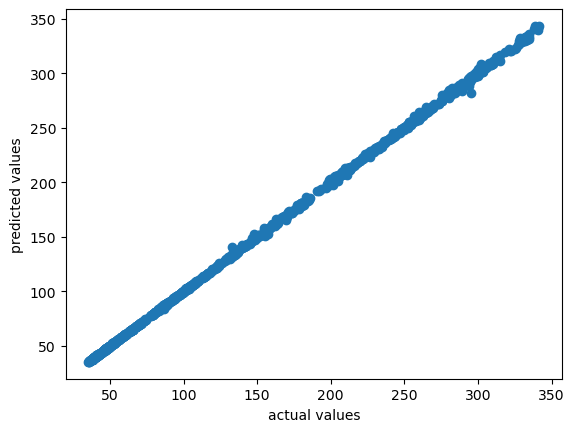

In [134]:
plt.scatter(y_train,y_pred)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()

In [136]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred)

0.9998571676453181